<a href="https://colab.research.google.com/github/sirlapat/ML_Assignment1/blob/main/ML_A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [18]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
file_path = '/content/drive/My Drive/Housing.csv'
housing = pd.DataFrame(pd.read_csv(file_path))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [20]:
H_df = pd.read_csv("/content/drive/MyDrive/Housing.csv")
H_df.head()



,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [21]:
housing.shape

(545, 13)

In [22]:
housing.isnull().sum()*100/housing.shape[0]

price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64

In [23]:
np.random.seed(0)
H_df_train, H_df_test = train_test_split(H_df, test_size = 0.2)
H_df_train.shape,H_df_test.shape


((436, 13), (109, 13))

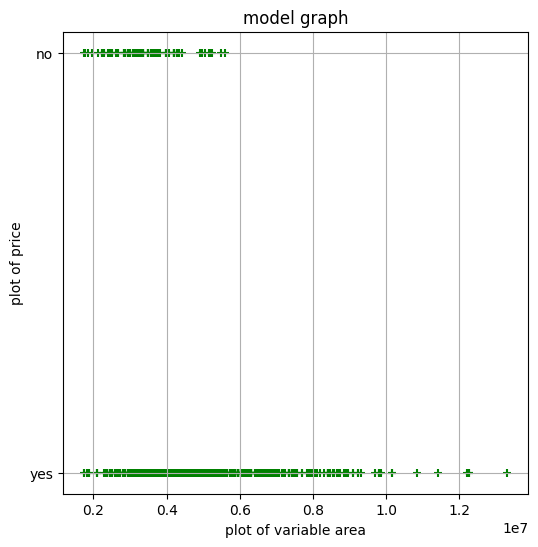

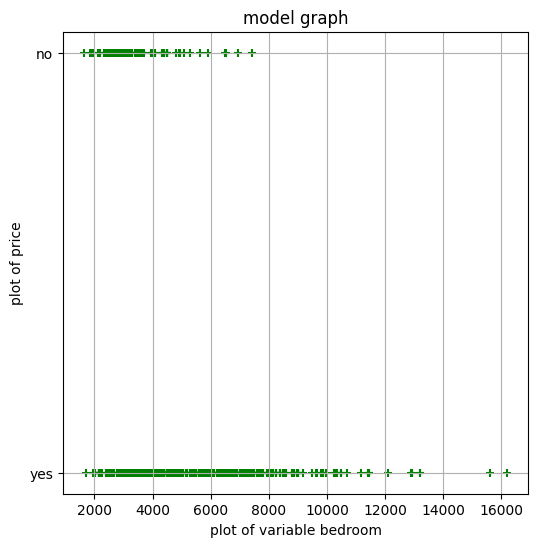

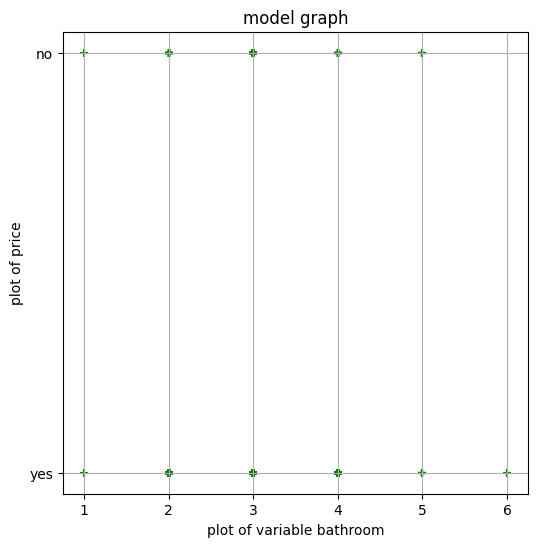

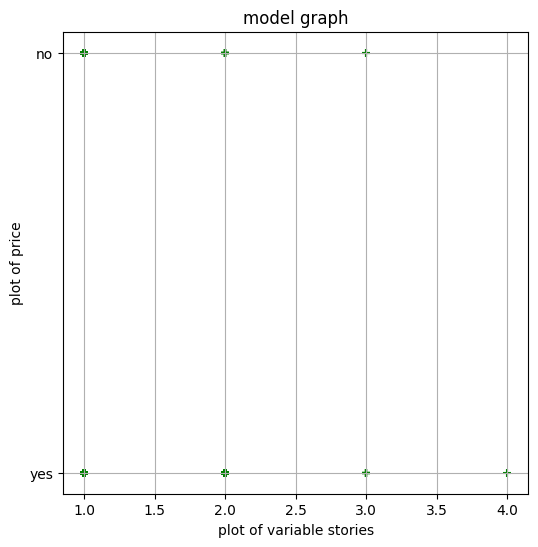

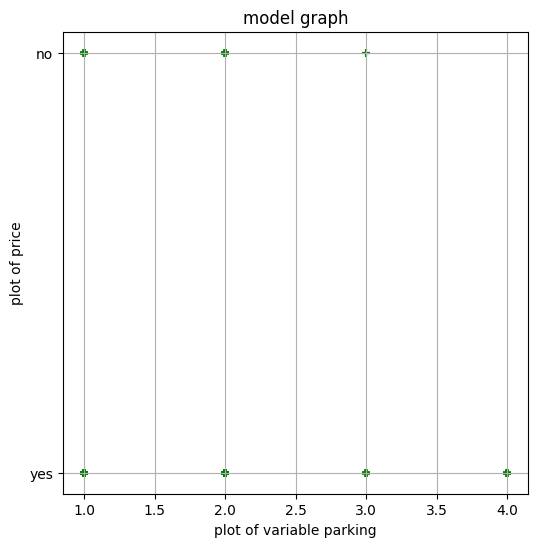

In [24]:
df = pd.read_csv('/content/drive/MyDrive/Housing.csv')
area = df.values[:,0]
bedroom = df.values[:,1]
bathroom = df.values[:,2]
stories = df.values[:,3]
parking = df.values[:,4]
price = df.values[:,5]

# Plot area
plt.scatter(area, price, color='green',marker='+')
plt.grid(True)
plt.rcParams["figure.figsize"] = (6, 6)
plt.xlabel('plot of variable area')
plt.ylabel('plot of price')
plt.title('model graph')

plt.show()

# Plot bedroom
plt.scatter(bedroom, price, color='green',marker='+')
plt.grid(True)
plt.rcParams["figure.figsize"] = (6, 6)
plt.xlabel('plot of variable bedroom')
plt.ylabel('plot of price')
plt.title('model graph')

plt.show()

# Plot bathroom
plt.scatter(bathroom, price, color='green',marker='+')
plt.grid(True)
plt.rcParams["figure.figsize"] = (6, 6)
plt.xlabel('plot of variable bathroom')
plt.ylabel('plot of price')
plt.title('model graph')

plt.show()

# Plot stories
plt.scatter(stories, price, color='green',marker='+')
plt.grid(True)
plt.rcParams["figure.figsize"] = (6, 6)
plt.xlabel('plot of variable stories')
plt.ylabel('plot of price')
plt.title('model graph')

plt.show()

# Plot parking
plt.scatter(parking, price, color='green',marker='+')
plt.grid(True)
plt.rcParams["figure.figsize"] = (6, 6)
plt.xlabel('plot of variable parking')
plt.ylabel('plot of price')
plt.title('model graph')

plt.show()

In [25]:
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

In [26]:
# List of variables to map

varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [27]:

H_df[binary_cols] = H_df[binary_cols].apply(binary_map)
H_df

np.random.seed(0)
H_df_train, H_df_test = train_test_split(H_df, test_size = 0.2)
H_df_train.shape,H_df_test.shape

def loss(X_values, Y_values, theta, m):


    h = X_values.dot(theta)
    err = np.subtract(h,Y_values)
    squareErr = np.square(err)
    loss_value = 1/(2*m) * np.sum(squareErr)

    return loss_value

In [28]:
def penalty_loss(X_values, Y_values, theta, m):

    h = X_values.dot(theta)
    err = np.subtract(h,Y_values)
    squareErr = np.square(err)
    penaltly_loss_value = 1/(2*m) * np.sum(squareErr)

    return penaltly_loss_value


In [29]:
def linear_regression(X_train, Y_train, X_test, Y_test, theta, alpha, iterations):

    training_loss_hist = np.zeros(iterations)
    validation_loss_hist = np.zeros(iterations)

    for i in range(iterations):
        h = X_train.dot(theta)

        err = np.subtract(h,Y_train)

        xy_dtheta = (1/m_train) * X_train.transpose().dot(err)
        theta = theta - alpha*xy_dtheta

        training_loss_hist[i] = loss(X_train, Y_train, theta, m_train)
        validation_loss_hist[i] = loss(X_test, Y_test, theta, m_test)

    return theta, training_loss_hist, validation_loss_hist


In [30]:
def penalty_linear_regression(X_train, Y_train, X_test, Y_test, theta, alpha, penalty, iterations):


    training_loss_hist = np.zeros(iterations)
    validation_loss_hist = np.zeros(iterations)

    for i in range(iterations):
        h = X_train.dot(theta)

        err = np.subtract(h,Y_train)

        xy_dtheta = (1/m_train) * X_train.transpose().dot(err)

        theta = theta*(1-alpha*penalty/m_train) - alpha*xy_dtheta

        training_loss_hist[i] = penalty_loss(X_train, Y_train, theta, m_train)
        validation_loss_hist[i] = penalty_loss(X_test, Y_test, theta, m_test)

    return theta, training_loss_hist, validation_loss_hist


In [31]:
def feature_scaling(H_df_train, H_df_test, categorical_cols, scaler):


    df_nrm_train = H_df_train

    df_nrm_train[['price']] = scaler.fit_transform(H_df_train[['price']])
    df_nrm_train[categorical_cols] = scaler.fit_transform(H_df_train[categorical_cols])

    Y_nrm_train = df_nrm_train[['price']].to_numpy()

    m_nrm_train = len(Y_nrm_train)

    X_nrm_train = df_nrm_train[categorical_cols].to_numpy()
    X_nrm_train = np.hstack((np.ones((m_nrm_train,1)), X_nrm_train))

    df_nrm_test = H_df_test

    df_nrm_test[['price']] = scaler.fit_transform(df_nrm_test[['price']])
    df_nrm_test[categorical_cols] = scaler.fit_transform(df_nrm_test[categorical_cols])

    Y_nrm_test = df_nrm_test[['price']].to_numpy()

    m_nrm_test = len(Y_nrm_test)

    X_nrm_test = df_nrm_test[categorical_cols].to_numpy()
    X_nrm_test = np.hstack((np.ones((m_nrm_test,1)), X_nrm_test))

    return X_nrm_train, Y_nrm_train, X_nrm_test, Y_nrm_test
categorical_cols_1 = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

Y_train = H_df_train[['price']].to_numpy()

m_train = len(Y_train)

X_train = H_df_train[categorical_cols_1].to_numpy()
X_train = np.hstack((np.ones((m_train, 1)), X_train))

Y_test = H_df_test[['price']].to_numpy()

m_test = len(Y_test)

X_test = H_df_test[categorical_cols_1].to_numpy()
X_test = np.hstack((np.ones((m_test, 1)), X_test))

In [32]:
iterations = 450
alpha = 0.00000000001

theta = np.zeros((6,1))

theta, training_loss_hist, validation_loss_hist = linear_regression(X_train, Y_train, X_test, Y_test, theta, alpha, iterations)



Text(0.5, 1.0, '1A: Training Loss per Iteration')

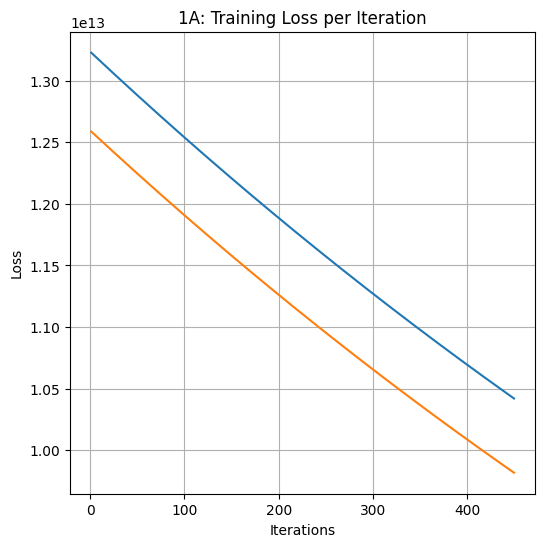

In [33]:
plt.plot(range(1, iterations + 1), training_loss_hist)
plt.plot(range(1, iterations + 1), validation_loss_hist)
plt.grid()
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('1A: Training Loss per Iteration')


In [34]:
categorical_cols_2 = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']

Y_train = H_df_train[['price']].to_numpy()

m_train = len(Y_train)

X_train = H_df_train[categorical_cols_2].to_numpy()
X_train = np.hstack((np.ones((m_train, 1)), X_train))

Y_test = H_df_test[['price']].to_numpy()

m_test = len(Y_test)

X_test = H_df_test[categorical_cols_2].to_numpy()
X_test = np.hstack((np.ones((m_test, 1)), X_test))



In [35]:
iterations = 450
alpha = 0.00000000001

theta = np.zeros((12,1))

theta, training_loss_hist, validation_loss_hist = linear_regression(X_train, Y_train, X_test, Y_test, theta, alpha, iterations)


Text(0.5, 1.0, '1B: Training Loss per Iteration')

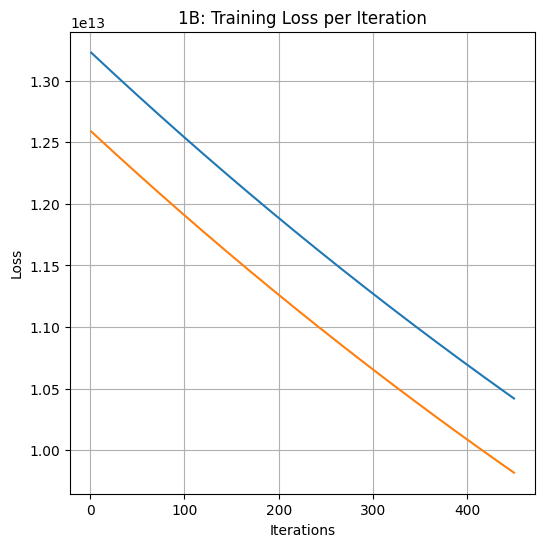

In [36]:
plt.plot(range(1, iterations + 1), training_loss_hist)
plt.plot(range(1, iterations + 1), validation_loss_hist)
plt.grid()
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('1B: Training Loss per Iteration')


In [37]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler()

df_nrm_train = H_df_train

df_nrm_train[['price']] = scaler.fit_transform(H_df_train[['price']])
df_nrm_train[categorical_cols_1] = scaler.fit_transform(H_df_train[categorical_cols_1])

Y_nrm_train = df_nrm_train[['price']].to_numpy()

m_nrm_train = len(Y_nrm_train)

X_nrm_train = df_nrm_train[categorical_cols_1].to_numpy()
X_nrm_train = np.hstack((np.ones((m_nrm_train,1)), X_nrm_train))


In [38]:
df_nrm_test = H_df_test

df_nrm_test[['price']] = scaler.fit_transform(df_nrm_test[['price']])
df_nrm_test[categorical_cols_1] = scaler.fit_transform(df_nrm_test[categorical_cols_1])

Y_nrm_test = df_nrm_test[['price']].to_numpy()

m_nrm_test = len(Y_nrm_test)

X_nrm_test = df_nrm_test[categorical_cols_1].to_numpy()
X_nrm_test = np.hstack((np.ones((m_nrm_test,1)), X_nrm_test))


In [39]:
iterations = 3000
alpha = 0.001

theta = np.zeros((6,1))

theta, training_loss_hist, validation_loss_hist = linear_regression(X_nrm_train, Y_nrm_train, X_nrm_test, Y_nrm_test, theta, alpha, iterations)


Text(0.5, 1.0, '2A: Training Loss per Iteration - Normalization')

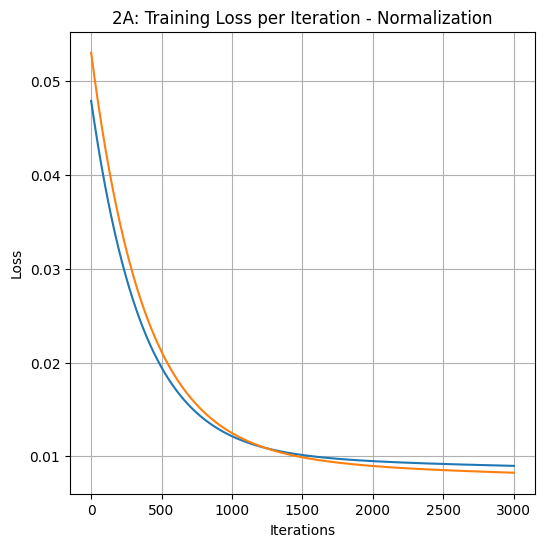

In [40]:
plt.plot(range(1, iterations + 1), training_loss_hist)
plt.plot(range(1, iterations + 1), validation_loss_hist)
plt.grid()
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('2A: Training Loss per Iteration - Normalization')


In [41]:
scaler = StandardScaler()

df_nrm_train = H_df_train

df_nrm_train[['price']] = scaler.fit_transform(H_df_train[['price']])
df_nrm_train[categorical_cols_1] = scaler.fit_transform(H_df_train[categorical_cols_1])

Y_nrm_train = df_nrm_train[['price']].to_numpy()

m_nrm_train = len(Y_nrm_train)

X_nrm_train = df_nrm_train[categorical_cols_1].to_numpy()
X_nrm_train = np.hstack((np.ones((m_nrm_train,1)), X_nrm_train))


In [42]:
df_nrm_test = H_df_test

df_nrm_test[['price']] = scaler.fit_transform(df_nrm_test[['price']])
df_nrm_test[categorical_cols_1] = scaler.fit_transform(df_nrm_test[categorical_cols_1])

Y_nrm_test = df_nrm_test[['price']].to_numpy()

m_nrm_test = len(Y_nrm_test)

X_nrm_test = df_nrm_test[categorical_cols_1].to_numpy()
X_nrm_test = np.hstack((np.ones((m_nrm_test,1)), X_nrm_test))


In [43]:
iterations = 3000
alpha = 0.001

theta = np.zeros((6,1))

theta, training_loss_hist, validation_loss_hist = linear_regression(X_nrm_train, Y_nrm_train, X_nrm_test, Y_nrm_test, theta, alpha, iterations)


Text(0.5, 1.0, '3A: Training Loss per Iteration - Standardization')

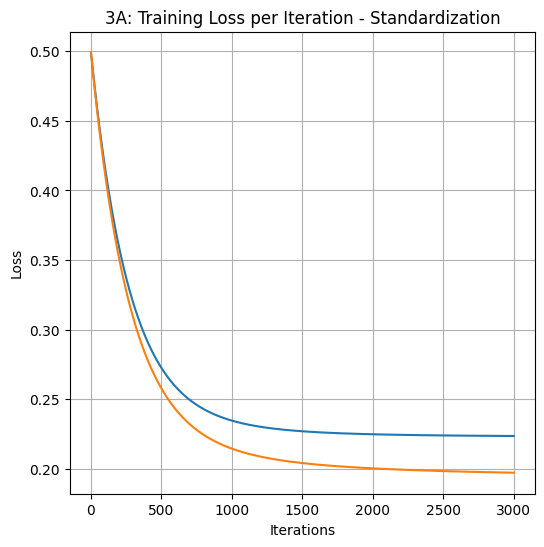

In [44]:
plt.plot(range(1, iterations + 1), training_loss_hist)
plt.plot(range(1, iterations + 1), validation_loss_hist)
plt.grid()
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('3A: Training Loss per Iteration - Standardization')


In [45]:
scaler = MinMaxScaler()

df_nrm_train = H_df_train

df_nrm_train[['price']] = scaler.fit_transform(H_df_train[['price']])
df_nrm_train[categorical_cols_2] = scaler.fit_transform(H_df_train[categorical_cols_2])

Y_nrm_train = df_nrm_train[['price']].to_numpy()

m_nrm_train = len(Y_nrm_train)

X_nrm_train = df_nrm_train[categorical_cols_2].to_numpy()
X_nrm_train = np.hstack((np.ones((m_nrm_train,1)), X_nrm_train))


In [46]:
df_nrm_test = H_df_test

df_nrm_test[['price']] = scaler.fit_transform(df_nrm_test[['price']])
df_nrm_test[categorical_cols_2] = scaler.fit_transform(df_nrm_test[categorical_cols_2])

Y_nrm_test = df_nrm_test[['price']].to_numpy()

m_nrm_test = len(Y_nrm_test)

X_nrm_test = df_nrm_test[categorical_cols_2].to_numpy()
X_nrm_test = np.hstack((np.ones((m_nrm_test,1)), X_nrm_test))


In [47]:
iterations = 3000
alpha = 0.001

theta = np.zeros((12,1))

theta, training_loss_hist, validation_loss_hist = linear_regression(X_nrm_train, Y_nrm_train, X_nrm_test, Y_nrm_test, theta, alpha, iterations)


Text(0.5, 1.0, '2B: Training Loss per Iteration - Normalization')

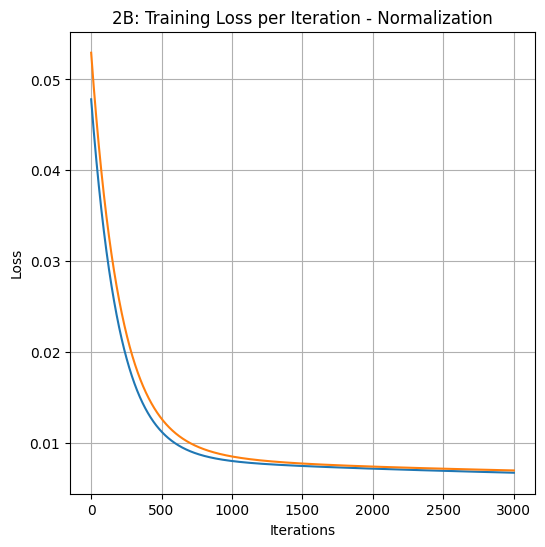

In [48]:
plt.plot(range(1, iterations + 1), training_loss_hist)
plt.plot(range(1, iterations + 1), validation_loss_hist)
plt.grid()
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('2B: Training Loss per Iteration - Normalization')


In [49]:
scaler = StandardScaler()

df_nrm_train = H_df_train

df_nrm_train[['price']] = scaler.fit_transform(H_df_train[['price']])
df_nrm_train[categorical_cols_2] = scaler.fit_transform(H_df_train[categorical_cols_2])

Y_nrm_train = df_nrm_train[['price']].to_numpy()

m_nrm_train = len(Y_nrm_train)

X_nrm_train = df_nrm_train[categorical_cols_2].to_numpy()
X_nrm_train = np.hstack((np.ones((m_nrm_train,1)), X_nrm_train))


In [50]:
df_nrm_test = H_df_test

df_nrm_test[['price']] = scaler.fit_transform(df_nrm_test[['price']])
df_nrm_test[categorical_cols_2] = scaler.fit_transform(df_nrm_test[categorical_cols_2])

Y_nrm_test = df_nrm_test[['price']].to_numpy()

m_nrm_test = len(Y_nrm_test)

X_nrm_test = df_nrm_test[categorical_cols_2].to_numpy()
X_nrm_test = np.hstack((np.ones((m_nrm_test,1)), X_nrm_test))


In [51]:
iterations = 2000
alpha = 0.01

theta = np.zeros((12,1))

theta, training_loss_hist, validation_loss_hist = linear_regression(X_nrm_train, Y_nrm_train, X_nrm_test, Y_nrm_test, theta, alpha, iterations)


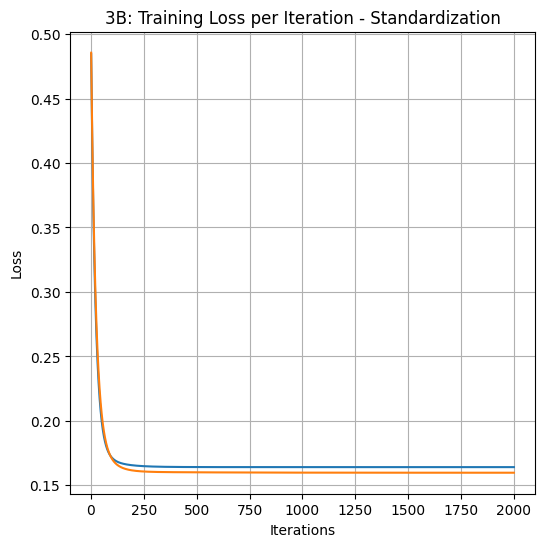

In [52]:
plt.plot(range(1, iterations + 1), training_loss_hist)
plt.plot(range(1, iterations + 1), validation_loss_hist)
plt.grid()
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('3B: Training Loss per Iteration - Standardization')
X_nrm_train, Y_nrm_train, X_nrm_test, Y_nrm_test = feature_scaling(H_df_train, H_df_test, categorical_cols_1, MinMaxScaler())


In [53]:
iterations = 4000
penalty = 1
alpha = 0.01

theta = np.zeros((6,1))

theta, training_loss_hist, validation_loss_hist = penalty_linear_regression(X_nrm_train, Y_nrm_train, X_nrm_test, Y_nrm_test, theta, alpha, penalty, iterations)


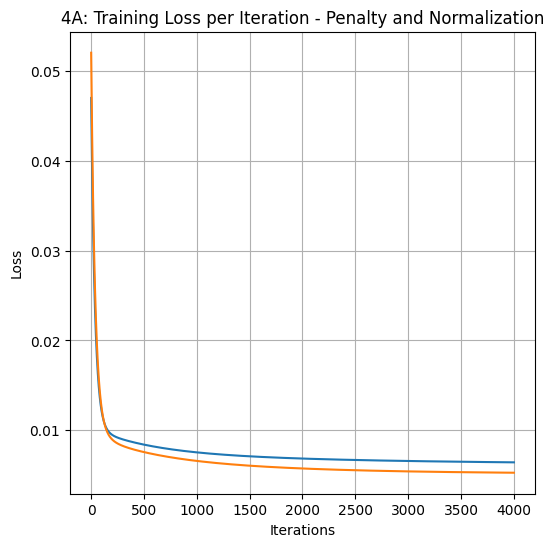

In [54]:
plt.plot(range(1, iterations + 1), training_loss_hist)
plt.plot(range(1, iterations + 1), validation_loss_hist)
plt.grid()
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('4A: Training Loss per Iteration - Penalty and Normalization')
X_nrm_train, Y_nrm_train, X_nrm_test, Y_nrm_test = feature_scaling(H_df_train, H_df_test, categorical_cols_2, MinMaxScaler())


In [55]:
iterations = 4000
penalty = 10
alpha = 0.01

theta = np.zeros((12,1))

theta, training_loss_hist, validation_loss_hist = penalty_linear_regression(X_nrm_train, Y_nrm_train, X_nrm_test, Y_nrm_test, theta, alpha, penalty, iterations)


Text(0.5, 1.0, '4B: Training Loss per Iteration - Penalty and Normalization')

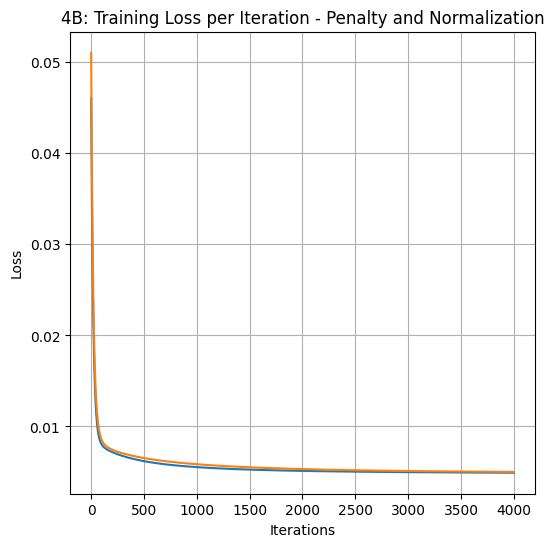

In [56]:
plt.plot(range(1, iterations + 1), training_loss_hist)
plt.plot(range(1, iterations + 1), validation_loss_hist)
plt.grid()
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('4B: Training Loss per Iteration - Penalty and Normalization')
